# 第x次实验实验报告
计算机系 计15 2021010803 郭高旭

## 实验目的
- 练习使用python求解简单的统计推断问题，包括：
  - 置信区间估计
  - 假设检验
- 掌握使用python求解统计推断问题的方法
- 了解统计推断的基本概念
- 了解统计推断在实际问题中的应用

## 第2题：

### 问题分析与算法设计

#### 第一问
实际情况下,加油站的油价看作是一个随机变量x,其概率密度函数可以用正态分布来近似即
$$
x \sim N(\mu,\sigma^2)
$$
设$\mu_0=115$,则题中的问题可以转化为假设检验问题:
$$
H_0:\mu=\mu_0=115;H_1:\mu\ne\mu_0
$$
由于总体的方差未知,所以采用t检验方法,检验统计量为
$$
t=\frac{\bar{x}-\mu_0}{s/\sqrt{n}}
$$
可以使用python的scipy库中的ttest_1samp函数进行检验
#### 第二问
分别给出的1月和2月的汽油价格在$\alpha=0.05$的显著性水平下的置信区间
#### 第三问
1月和月价格差在$\alpha=0.05$的显著性水平下的置信区间,属于双样本t检验问题,检验统计量为
$$
t=\frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{s^2}{n_1}+\frac{s^2}{n_2}}},其中s=\sqrt{\frac{(n_1-1)s_1^2+(n_2-1)s_2^2}{n_1+n_2-2}}
$$


### 代码实现与结果
下面是代码实现，使用python实现了上述算法

In [36]:
import numpy as np
import scipy.stats as stats

dataset ={
    'jan': [119, 117, 115, 116, 112, 121, 115, 122, 116, 118, 109, 112, 119, 112, 117, 113, 114, 109, 109, 118],
    'feb': [118, 119, 115, 122, 118, 121, 120, 122, 128, 116, 120, 123, 121, 119, 117, 119, 128, 126, 118, 125],
}

mu0 = 115
alpha = 0.05

# Convert the lists to numpy arrays for easier calculations
jan_prices = np.array(dataset['jan'])
feb_prices = np.array(dataset['feb'])

#average

mean_jan=np.mean(jan_prices)
mean_feb=np.mean(feb_prices)

print(f"1月汽油价格的平均值: {mean_jan}", f"2月汽油价格的平均值: {mean_feb}")

t_stat_jan, p_value_jan = stats.ttest_1samp(jan_prices, mu0)
t_stat_feb, p_value_feb = stats.ttest_1samp(feb_prices, mu0)

print(f"1月汽油价格的t检验统计量: {t_stat_jan}, p值: {p_value_jan}")
print(f"2月汽油价格的t检验统计量: {t_stat_feb}, p值: {p_value_feb}")

mean_jan = np.mean(jan_prices)
std_err_jan = stats.sem(jan_prices)
conf_int_jan = stats.t.interval(1 - alpha, len(jan_prices) - 1, loc=mean_jan, scale=std_err_jan)

mean_feb = np.mean(feb_prices)
std_err_feb = stats.sem(feb_prices)
conf_int_feb = stats.t.interval(1 - alpha, len(feb_prices) - 1, loc=mean_feb, scale=std_err_feb)

print(f"1月汽油价格在α=0.05显著性水平下的置信区间: {conf_int_jan}")
print(f"2月汽油价格在α=0.05显著性水平下的置信区间: {conf_int_feb}")

mean_jan = np.mean(jan_prices)
mean_feb = np.mean(feb_prices)
mean_diff = mean_jan - mean_feb

# 标准误差计算
std_err_jan = np.std(jan_prices, ddof=1) / np.sqrt(len(jan_prices))
std_err_feb = np.std(feb_prices, ddof=1) / np.sqrt(len(feb_prices))
std_err_diff = np.sqrt(std_err_jan**2 + std_err_feb**2)

# 自由度计算（可以使用近似公式）
df = len(jan_prices) + len(feb_prices) - 2

# 置信区间计算
t_critical = stats.t.ppf(1 - alpha/2, df)
margin_of_error = t_critical * std_err_diff
conf_int_diff = (mean_diff - margin_of_error, mean_diff + margin_of_error)

print(f"1月和2月价格差在α=0.05显著性水平下的置信区间: {conf_int_diff}")

1月汽油价格的平均值: 115.15 2月汽油价格的平均值: 120.75
1月汽油价格的t检验统计量: 0.17334198375344173, p值: 0.8642160061892782
2月汽油价格的t检验统计量: 6.9281343008173835, p值: 1.3240735570489704e-06
1月汽油价格在α=0.05显著性水平下的置信区间: (113.33881957294425, 116.96118042705577)
2月汽油价格在α=0.05显著性水平下的置信区间: (119.01289621559044, 122.48710378440956)
1月和2月价格差在α=0.05显著性水平下的置信区间: (-8.027274417173235, -3.172725582826754)


### 结果分析

- 第一问
  - 一月份由于p值大于0.05，所以接受原假设，即认为加油站的油价等于115 
  - 二月份由于p值小于0.05，所以拒绝原假设，即认为加油站的油价不等于115
- 第二问
  - 在$\alpha=0.05$的显著性水平下，一月份的汽油价格的置信区间为[113.34,116.96]
  - 在$\alpha=0.05$的显著性水平下，二月份的汽油价格的置信区间为[119.01,122.49]
- 第三问
  - 在$\alpha=0.05$的显著性水平下，一月份和二月份的汽油价格差的置信区间为[-8.03,-3.17]
- 上述问题的单位均为美分/加仑

### 意义
- 通过本次实验，我学会了如何使用python进行假设检验
- 在实际问题中，我们可以通过假设检验来判断某个问题的真假，从而为我们的决策提供依据。在本题情景下，我们可以通过假设检验来判断加油站的油价是否发生了变化，从而为我们的决策提供依据。

## 第6题：
### 问题分析与模型建立

#### 第一问
首先按照要求绘制出箱线图，先观察是否大致符合正态分布，然后使用`scipy.stats.normaltest`进一步检验是否符合正态分布

#### 第二问
这一问是利用样本对总体的均值进行估计，点估计即为样本均值，置信区间估计即为样本均值的置信区间，可以使用`scipy.stats.t.interval`函数进行计算

#### 第三问

实际情况下,学生的身高与体重可以看作是两个随机变量$x_1,x_2$,其概率密度函数可以用正态分布来近似即
$$
x_1 \sim N(\mu_1,\sigma_1^2)\\
x_2 \sim N(\mu_2,\sigma_2^2)
$$
设$\mu_1=170,\mu_2=65$,则题中的问题可以转化为假设检验问题:
$$
H_0:\mu_1=\mu_2;H_1:\mu_1\ne\mu_2
$$
由于总体的方差未知,所以采用t检验方法,检验统计量为
$$
t=\frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}
$$
可以使用python的scipy库中的ttest_ind函数进行检

### 代码实现与结果


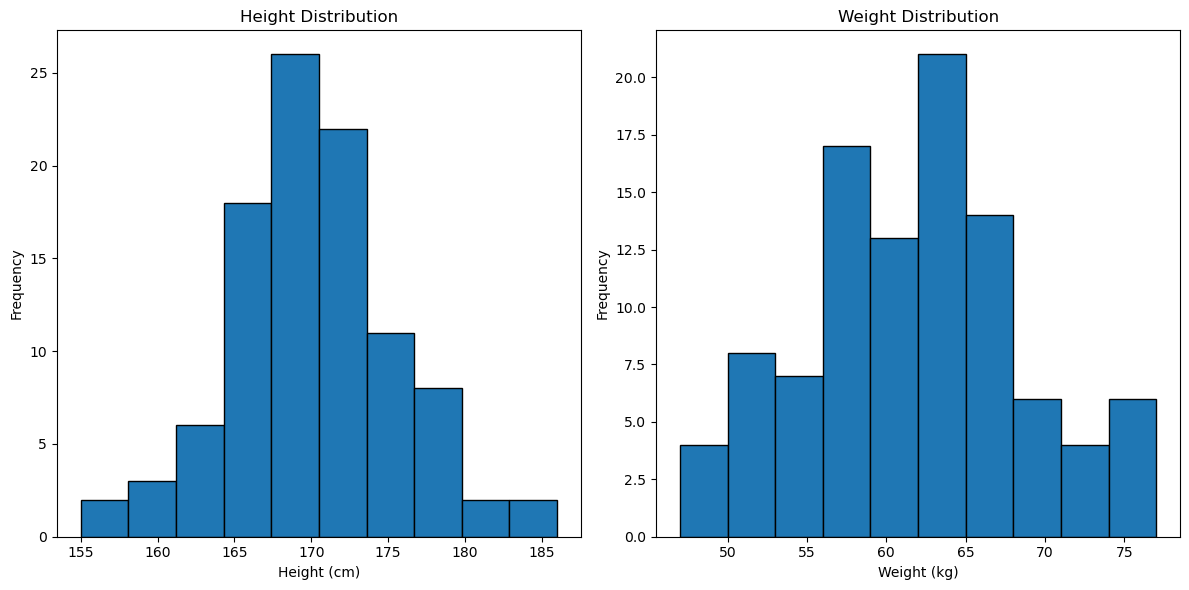

In [37]:
heights = np.array(
    [
        172, 171, 166, 160, 155, 173, 166, 170, 167, 173, 178, 173, 163, 165, 170, 163, 172, 182, 171, 177,
        169, 168, 168, 175, 176, 168, 161, 169, 171, 178, 177, 170, 173, 172, 170, 172, 177, 176, 175, 184,
        169, 165, 164, 173, 172, 169, 173, 173, 166, 163, 170, 160, 165, 177, 169, 176, 177, 172, 165, 166,
        171, 169, 170, 172, 169, 167, 175, 164, 166, 169, 167, 179, 176, 182, 186, 166, 169, 173, 169, 171,
        167, 168, 165, 168, 176, 170, 158, 165, 172, 169, 169, 172, 162, 175, 174, 167, 166, 174, 168, 170
    ]
)

weights = np.array(
    [
        75, 62, 62, 55, 57, 58, 55, 63, 53, 60, 60, 73, 47, 66, 60, 50, 57, 63, 59, 64,
        55, 67, 65, 67, 64, 50, 49, 63, 61, 64, 66, 58, 67, 59, 62, 59, 58, 68, 68, 70,
        64, 52, 59, 74, 69, 52, 57, 61, 70, 57, 56, 65, 58, 66, 63, 60, 67, 56, 56, 49,
        65, 62, 58, 64, 58, 72, 76, 59, 63, 54, 54, 62, 63, 69, 77, 76, 72, 59, 65, 71,
        47, 65, 64, 57, 57, 57, 51, 62, 53, 66, 58, 50, 52, 75, 66, 63, 50, 64, 62, 59
    ]
)

import matplotlib.pyplot as plt

# 绘制直方图，两个子图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

ax1.hist(heights, bins=10, edgecolor='black')
ax1.set_title('Height Distribution')
ax1.set_xlabel('Height (cm)')
ax1.set_ylabel('Frequency')

ax2.hist(weights, bins=10, edgecolor='black')
ax2.set_title('Weight Distribution')
ax2.set_xlabel('Weight (kg)')
ax2.set_ylabel('Frequency')

plt.tight_layout()
plt.show()



In [38]:
# 检验正态性
_, p_value_heights = stats.normaltest(heights)
_, p_value_weights = stats.normaltest(weights)

print(f"身高数据正态性检验的p值: {p_value_heights}")
print(f"体重数据正态性检验的p值: {p_value_weights}")

身高数据正态性检验的p值: 0.3314020360276578
体重数据正态性检验的p值: 0.7222735327952048


In [39]:
alpha = 0.05
# 估计总体均值，区间估计
mean_heights = np.mean(heights)
mean_weights = np.mean(weights)

def estimate_population_mean_unknown_variance(sample, confidence_level=0.95):
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    n = len(sample)
    alpha = 1 - confidence_level
    t_value = stats.t.ppf(1 - alpha / 2, df=n-1)
    margin_of_error = t_value * (sample_std / np.sqrt(n))
    conf_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    return conf_interval

conf_int_heights = estimate_population_mean_unknown_variance(heights)
conf_int_weights = estimate_population_mean_unknown_variance(weights)

# 点估计
print(f"身高总体均值的点估计: {mean_heights}")
print(f"体重总体均值的点估计: {mean_weights}")

print(f"身高总体均值的置信区间: {conf_int_heights}","置信水平为95%")
print(f"体重总体均值的置信区间: {conf_int_weights}", "置信水平为95%")


身高总体均值的点估计: 170.25
体重总体均值的点估计: 61.27
身高总体均值的置信区间: (169.1781684477827, 171.3218315522173) 置信水平为95%
体重总体均值的置信区间: (59.90229691243355, 62.63770308756646) 置信水平为95%


In [40]:
# t检验
heights_original_mean = 167.5
weights_original_mean = 60.2

t_stat_heights, p_value_heights = stats.ttest_1samp(heights, heights_original_mean)
t_stat_weights, p_value_weights = stats.ttest_1samp(weights, weights_original_mean)

print(f"身高数据的t检验统计量: {t_stat_heights}, p值: {p_value_heights}")
print(f"体重数据的t检验统计量: {t_stat_weights}, p值: {p_value_weights}")

身高数据的t检验统计量: 5.090908739680904, p值: 1.7003185736956768e-06
体重数据的t检验统计量: 1.5523194744642497, p值: 0.12377686784187773


### 结果分析
在置信水平为0.95的情况下，我们可以得到以下结论：
- 第一问
  - 通过箱线图，可以看出两项数据大致符合正态分布
  - 正态检验的p值均大于0.05，所以认为数据符合正态分布
- 第二问
  - 体重的置信区间为[59.90, 62.64]kg
  - 身高的置信区间为[169.18, 171.32]cm
- 第三问
  - 由于身高p值小于0.05，所以拒绝原假设，即认为学生的身高和之前的平均身高不相等
  - 由于体重p值大于0.05，所以接受原假设，即认为学生的体重和之前的平均体重无变化

### 意义

- 通过本次实验，我学会了如何使用python进行假设检验
- 假设检验的目的是为了判断某个问题的真假。在本题情景下，我们可以通过假设检验来判断学生的身高和体重是否发生了变化.


## 第7题：

### 问题分析与模型建立
设正常人和患胃溃疡病人的酶含量均服从正态分布，均值$\mu_1,\mu_2$，标准差$\sigma_1,\sigma_2$,问题转化为
$$
H_0:\mu_1=\mu_2;H_1:\mu_1\ne\mu_2
$$
由于样本方差未知且不同,所以采用两独立样本t检验方法,检验统计量为
$$
t=\frac{\bar{x_1}-\bar{x_2}}{\sqrt{\frac{s_1^2}{n_1}+\frac{s_2^2}{n_2}}}
$$
可以使用python的scipy库中的ttest_ind函数进行检验

### 代码实现与结果

In [41]:
import numpy as np
from scipy.stats import ttest_ind

A = np.array(
    [
        0.2, 10.4, 0.3, 0.4, 10.9, 11.3,
        1.1, 2.0, 12.4, 16.2, 2.1, 17.6,
        18.9, 3.3, 3.8, 20.7, 4.5, 4.8,
        24.0, 25.4, 4.9, 40.0, 5.0, 42.2,
        5.3, 50.0, 60.0, 7.5, 9.8, 45.0,
    ]
)

patient_true = A[0:25]

B = np.array(
    [
        0.2, 5.4, 0.3, 5.7, 0.4, 5.8,
        0.7, 7.5, 1.2, 8.7, 1.5, 8.8,
        1.5, 9.1, 1.9, 10.3, 2.0, 15.6,
        2.4, 16.1, 2.5, 16.5, 2.8, 16.7,
        3.6, 20.0, 4.8, 20.7, 4.8, 33.0,
    ]
)

# 进行双样本t检验
t_stat1, p_value1 = ttest_ind(A, B)
t_stat2, p_value2 = ttest_ind(patient_true, B)

print(f"t统计量: {t_stat1}, p值: {p_value1}")
print(f"t统计量: {t_stat2}, p值: {p_value2}")



t统计量: 2.298781633732241, p值: 0.025139307174666167
t统计量: 1.4397673326270424, p值: 0.1558140584403965


### 结果分析
在置信水平为0.95的情况下，我们可以得到以下结论：
- 根据原始数据,p值小于0.05，所以拒绝原假设，即认为两个样本的均值不相等
- 根据去掉后5个数据的数据,p值大于0.05，所以接受原假设，即认为两个样本的均值相等

### 结论
在置信水平为0.95的情况下,原始数据说明病人的"酶含量"和"正常人"有显著区别,但是去掉后5个数据后,病人的"酶含量"和"正常人"无显著区别.

### 意义
- 假设检验的目的是为了判断某个问题的真假。在本题情景下，我们可以通过假设检验来判断病人的"酶含量"和"正常人"是否有显著区别.